In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [59]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/post_feature_selection_gurgaon_real_estate.csv')

In [96]:
df.head(2)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,builtup_area,servant room,furnishing_type,luxury_category,floor_category,price
0,0.0,99.0,3.0,3.0,3.0,3.0,1603.0,0.0,1.0,1.0,0.0,1.26
1,0.0,77.0,4.0,4.0,1.0,3.0,1783.0,0.0,0.0,2.0,0.0,1.72


In [83]:
df.shape

(3732, 12)

In [ ]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category

In [97]:
X = df.drop(['price'],axis=1)
y = df['price']

In [81]:
df.isnull().sum()

property_type      0
sector             0
bedRoom            0
bathroom           0
balcony            0
agePossession      0
builtup_area       0
servant room       0
furnishing_type    0
luxury_category    0
floor_category     0
price              0
dtype: int64

In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [99]:
col_to_encode = ['property_type','sector','balcony','agePossession','furnishing_type','luxury_category','floor_category']


In [ ]:
X['sector'].value_counts()

<Axes: xlabel='price', ylabel='Density'>

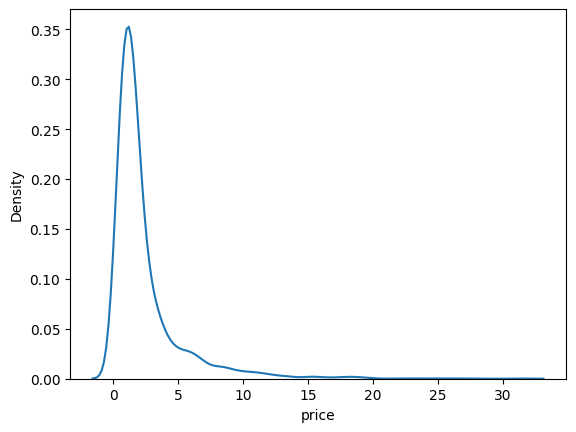

In [100]:
sns.kdeplot(df['price'])

In [101]:
# since target is right skewed- > applying log transformation

y_transformed = np.log1p(y)

In [ ]:
y_transformed

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3732 non-null   float64
 1   sector           3732 non-null   float64
 2   bedRoom          3732 non-null   float64
 3   bathroom         3732 non-null   float64
 4   balcony          3732 non-null   float64
 5   agePossession    3732 non-null   float64
 6   builtup_area     3732 non-null   float64
 7   servant room     3732 non-null   float64
 8   furnishing_type  3732 non-null   float64
 9   luxury_category  3732 non-null   float64
 10  floor_category   3732 non-null   float64
 11  price            3732 non-null   float64
dtypes: float64(12)
memory usage: 350.0 KB


In [102]:
# creating column transformer for preprocessing

preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(), ['bedRoom', 'bathroom', 'builtup_area', 'servant room']),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),col_to_encode)
        ],
    remainder = 'passthrough'
)

In [103]:
# creating a pipeline

pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',SVR(kernel='rbf')),
  ])

In [104]:
# kfold cross validation

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [105]:
scores.mean()

0.8893604689242138

In [106]:
scores.std()

0.016915329406580002

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [108]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bedRoom', 'bathroom',
                                                   'builtup_area',
                                                   'servant room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['property_type', 'sector',
                                                   'balcony', 'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [109]:
y_pred = pipeline.predict(X_test)

In [110]:
y_pred = np.expm1(y_pred)

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.518158673580469

In [114]:
mean_squared_error(np.expm1(y_test),y_pred,squared=False)

1.356878523770399